In [2]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs

In [3]:
import csv
with open('Tomas_Otava_CDG_Epidermal_growth_factor_receptor_erbB1_list_of_compounds.csv','r') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=";")
    rawdata = [x for x in reader]
lig_MOLECULES = [Chem.MolFromSmiles(x['Smiles']) for x in rawdata]

Načtení erbB1

In [4]:
suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

RDKit ERROR: [10:43:00] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [10:43:00] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [10:43:00] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [10:43:00] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [10:43:00] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [10:43:01] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:43:01] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [10:43:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:43:01] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [10:43:01] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [10:43:01] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [10:43:01] Can't kek

RDKit ERROR: [10:43:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [10:43:01] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:43:01] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [10:43:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:43:01] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [10:43:01] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [10:43:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [10:43:01] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [10:43:01] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [10:43:01] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [10:43:01] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [10:43:02] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [10:43:02] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [10:43:02] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [10:43:02] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [10:43:03] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [10:43:03] ERROR: Could not sanitize molecule ending on line 1151592


7113

Načtení drugbanku

In [5]:
import itertools
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def VisualizeMatch(structure, pattern):
    # GetSubstructMatches grabs all hits, GetSubstructMatch the first one it finds
    hits = structure.GetSubstructMatches(pattern)
    hit_atoms = set()
    hit_bonds = set()
    for hit in hits:
        hit_atoms.update(hit)
        hit_bonds.update([structure.GetBondBetweenAtoms(i, j).GetIdx()
                          for i, j in itertools.combinations(hit_atoms, 2)
                          if structure.GetBondBetweenAtoms(i, j)])
    d = rdMolDraw2D.MolDraw2DSVG(300,300)
    rdMolDraw2D.PrepareAndDrawMolecule(d, structure, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
    d.FinishDrawing()
    display(SVG(d.GetDrawingText()))

In [6]:
def TanimotoSimilarity(vector1, vector2):
    set_bits = 0
    shared_bits = 0
    for bit1, bit2 in zip(vector1, vector2):
        if bit1 or bit2:
            set_bits += 1
            if bit1 and bit2:
                shared_bits += 1
    return shared_bits / set_bits

In [7]:
MACCSKey3344 = MACCSkeys.GenMACCSKeys(lig_MOLECULES[3344])
MACCSKey3345 = MACCSkeys.GenMACCSKeys(lig_MOLECULES[3345])
TanimotoSimilarity(MACCSKey3344,MACCSKey3345)

0.5

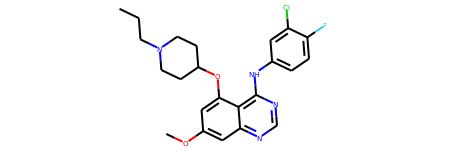

In [8]:
lig_MOLECULES[3344]

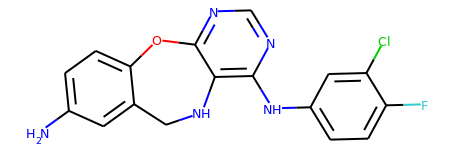

In [9]:
lig_MOLECULES[3345]

Opravdu zhruba polovina molekuly je stejná :D

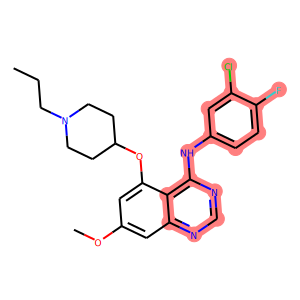

In [10]:
exp_pattern =  Chem.MolFromSmiles('C1(=CC=NC=N1)NC2=CC(=C(C=C2)F)Cl')
VisualizeMatch(lig_MOLECULES[3344],exp_pattern)

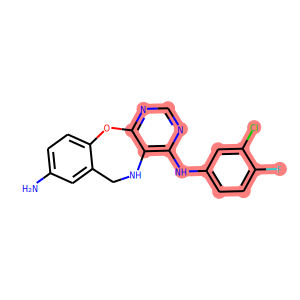

In [11]:
VisualizeMatch(lig_MOLECULES[3345],exp_pattern)

In [12]:
erbB1_ligands_MACCSKey = [MACCSkeys.GenMACCSKeys(x) for x in lig_MOLECULES]
drugs_MACCSKey = [MACCSkeys.GenMACCSKeys(x) for x in drugs]

In [13]:
erbB1_ligands_ECFP = [Chem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024) for x in lig_MOLECULES]
drugs_ECFP = [Chem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024) for x in drugs]

In [14]:
def SimilaritySearch(query_fp, searched_fp_set, cutoff=0.8):
    hits = []
    for i, fp in enumerate(searched_fp_set):
        similarity = DataStructs.TanimotoSimilarity(query_fp, fp)
        if similarity >= cutoff:
            hits.append((i, similarity))
    return sorted(hits, key=lambda x: x[1], reverse=True)

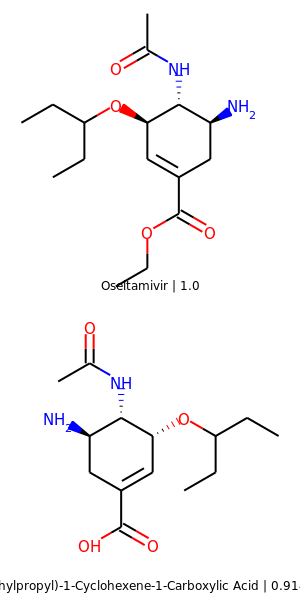

In [15]:
tamiflu = Chem.MolFromSmiles('CCC(CC)OC1C=C(CC(C1NC(=O)C)N)C(=O)OCC')
tamiflu_fp = MACCSkeys.GenMACCSKeys(tamiflu)
hits = SimilaritySearch(tamiflu_fp, drugs_MACCSKey)
Draw.MolsToGridImage([drugs[hit[0]] for hit in hits],
                     molsPerRow=1, subImgSize=(300,300),
                     legends=["{} | {}".format(drugs[hit[0]].GetProp('GENERIC_NAME'), hit[1]) for hit in hits])

Já jsem si zvolil na porovnání Tamiflu přípravek pro léčbu a prevenci chřipky a skutečně jsem v drugbanku nalezl samotný Oseltamivir (generický název Tamiflu) a volnou kyselinu diastereomeru.

In [16]:
Hits_3344 = SimilaritySearch(erbB1_ligands_MACCSKey[3344], drugs_MACCSKey)
Hits_3344

[(4448, 0.859375),
 (6583, 0.859375),
 (207, 0.8461538461538461),
 (3602, 0.8059701492537313),
 (4598, 0.8059701492537313)]

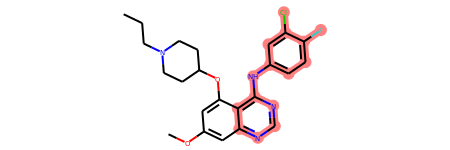

In [17]:
lig_MOLECULES[3344]

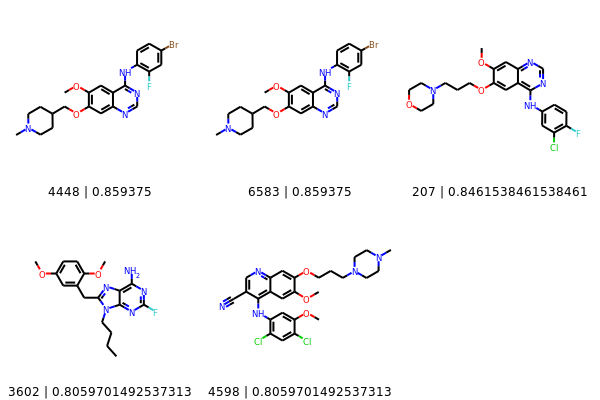

In [18]:
Draw.MolsToGridImage([drugs[hit[0]] for hit in Hits_3344], legends=["{} | {}".format(hit[0], hit[1]) for hit in Hits_3344])

Pro proklepnutí funkce strukturní similarity podle MACCSKey jsem si vybral opět můj oblíbený ligand 3344 a zjistil jsem, že 80% sdílí podobnost (využitím Tanimotovi similarity) s 5 látkami (teda vlastně 4, ptz látky 4448 a 6583 jsou identické, asi nějáka chyba databáze).

Po vizualizaci látek jsem si dále všiml, že 2 z nich mají již diskutované CHINAZINOLYLAMINOVÉ JÁDRO.

In [19]:
Hits_3344_ECFP = SimilaritySearch(erbB1_ligands_ECFP[3344], drugs_ECFP)
Hits_3344_ECFP

[]

In [20]:
DataStructs.TanimotoSimilarity(erbB1_ligands_ECFP[3344],drugs_ECFP[4448])

0.33707865168539325

In [21]:
DataStructs.TanimotoSimilarity(erbB1_ligands_ECFP[3344],drugs_ECFP[207])

0.5061728395061729

In [22]:
DataStructs.TanimotoSimilarity(erbB1_ligands_ECFP[3344],drugs_ECFP[3602])

0.20430107526881722

In [23]:
DataStructs.TanimotoSimilarity(erbB1_ligands_ECFP[3344],drugs_ECFP[4598])

0.24742268041237114

Při použití ECFP namísto MACCS jsem bohužel nedostal žádné výsledky pro podobnost nad 80 %

Nejlepší výsledek měla 207 a to 50 %

In [24]:
erbB1_ligands_queries = [(i, SimilaritySearch(ligand_ECFP, drugs_ECFP))
                     for i, ligand_ECFP in enumerate(erbB1_ligands_ECFP)]
erbB1_ligands_queries

[(0, []),
 (1, []),
 (2, []),
 (3, []),
 (4, []),
 (5, []),
 (6, []),
 (7, []),
 (8, []),
 (9, []),
 (10, []),
 (11, []),
 (12, []),
 (13, []),
 (14, []),
 (15, []),
 (16, [(1429, 1.0)]),
 (17, []),
 (18, []),
 (19, []),
 (20, []),
 (21, []),
 (22, []),
 (23, []),
 (24, []),
 (25, []),
 (26, []),
 (27, []),
 (28, []),
 (29, []),
 (30, []),
 (31, []),
 (32, []),
 (33, []),
 (34, [(5522, 0.803921568627451)]),
 (35, []),
 (36, []),
 (37, []),
 (38, []),
 (39, []),
 (40, []),
 (41, []),
 (42, []),
 (43, []),
 (44, []),
 (45, []),
 (46, []),
 (47, []),
 (48, []),
 (49, []),
 (50, []),
 (51, []),
 (52, []),
 (53, []),
 (54, []),
 (55, []),
 (56, []),
 (57, []),
 (58, []),
 (59, []),
 (60, []),
 (61, []),
 (62, []),
 (63, [(1132, 1.0)]),
 (64, []),
 (65, []),
 (66, []),
 (67, []),
 (68, []),
 (69, []),
 (70, []),
 (71, []),
 (72, []),
 (73, []),
 (74, [(2685, 1.0)]),
 (75, [(6291, 0.8333333333333334)]),
 (76, []),
 (77, []),
 (78, []),
 (79, []),
 (80, []),
 (81, []),
 (82, []),
 (83, []),
 (

In [25]:
erbB1_ligand_Hits = [hit for hit in erbB1_ligands_queries if hit[1]]
erbB1_ligand_Hits

[(16, [(1429, 1.0)]),
 (34, [(5522, 0.803921568627451)]),
 (63, [(1132, 1.0)]),
 (74, [(2685, 1.0)]),
 (75, [(6291, 0.8333333333333334)]),
 (91, [(1429, 1.0)]),
 (109, [(3438, 0.8113207547169812)]),
 (143, [(5522, 1.0)]),
 (147, [(1004, 1.0), (2587, 1.0)]),
 (149, [(415, 1.0)]),
 (151, [(892, 1.0)]),
 (153, [(302, 1.0), (937, 0.84)]),
 (157, [(428, 1.0)]),
 (159, [(771, 1.0)]),
 (167, [(1128, 1.0), (242, 0.8064516129032258)]),
 (188, [(3721, 1.0)]),
 (196, [(1132, 0.8690476190476191)]),
 (211, [(4476, 1.0)]),
 (228, [(1132, 1.0)]),
 (270, [(4346, 1.0)]),
 (282, [(3438, 0.9056603773584906)]),
 (283, [(5522, 0.84)]),
 (298, [(5853, 1.0), (1140, 0.8032786885245902)]),
 (342, [(1754, 0.8125)]),
 (367, [(380, 1.0), (1229, 0.8805970149253731)]),
 (387, [(4448, 1.0), (6583, 1.0)]),
 (388, [(1076, 0.8043478260869565)]),
 (389, [(848, 1.0)]),
 (390, [(4677, 1.0)]),
 (391, [(337, 1.0)]),
 (396, [(681, 0.8095238095238095)]),
 (397, [(370, 1.0)]),
 (398, [(1123, 0.9888888888888889)]),
 (400, [(326

In [26]:
len(erbB1_ligands_queries), len(erbB1_ligand_Hits)

(12496, 1297)

Po porovnání všech ligandů erbB1 setu s molekulami Drugbanku jsem zjistil, že 1297 ligandů z 12496 se podobá některým molekulám z Drugbanku.

Nutno říct, že drtivá většina těchto ligandů je přímo obsažena v Drugbanku (Tanimotova similarita je rovna 1)

In [27]:
erbB1_ligand_Hits[994]

(9014,
 [(397, 1.0),
  (4368, 0.8581560283687943),
  (4027, 0.8333333333333334),
  (3654, 0.8102189781021898)])

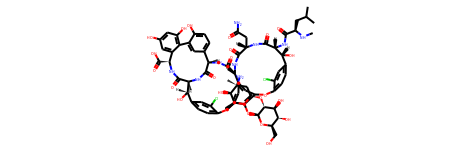

In [28]:
lig_MOLECULES[erbB1_ligand_Hits[994][0]]

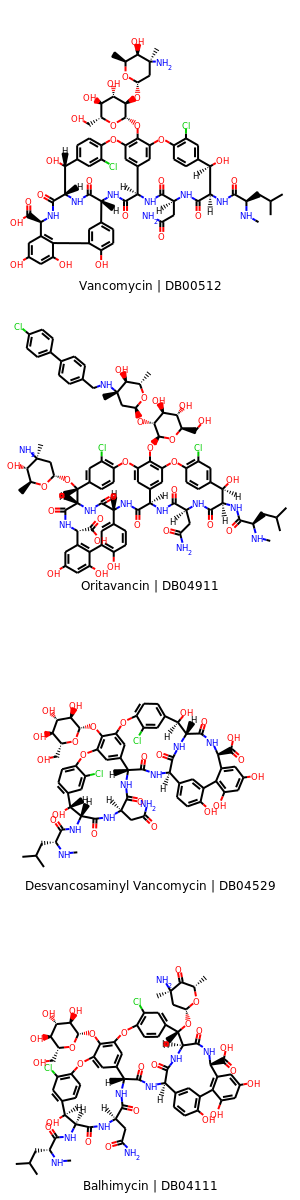

In [29]:
Hit_molecules = [drugs[index] for index, similarity in erbB1_ligand_Hits[994][1]]
Draw.MolsToGridImage(Hit_molecules, molsPerRow=1, subImgSize=(300,300),
                     legends=["{} | {}".format(m.GetProp('GENERIC_NAME'), m.GetProp('DRUGBANK_ID'))
                              for m in Hit_molecules])

Ligand z mého setu, na kterém demonstruju vizualizaci podobných molekul v Drugbanku je známé glykopeptidové antibiotikum Vankomycin.

Další 3 strukturně podobné látky jsou více méně jeho ať už přímé nebo nepřímé analogy, které mají taktéž antibakteriální aktivitu. Jedná se o Oritavancin, Balhimycin a Desvancosaminyl Vancomycin.

In [30]:
drugs_hitcounts = {}
for ligand, hits in erbB1_ligand_Hits:
    for hit, similarity in hits:
        drugs_hitcounts[hit] = drugs_hitcounts.get(hit, 0) + 1
drugs_hitcounts

{1429: 11,
 5522: 32,
 1132: 60,
 2685: 2,
 6291: 3,
 3438: 10,
 1004: 1,
 2587: 1,
 415: 89,
 892: 1,
 302: 2,
 937: 2,
 428: 1,
 771: 1,
 1128: 2,
 242: 2,
 3721: 1,
 4476: 27,
 4346: 4,
 5853: 16,
 1140: 17,
 1754: 21,
 380: 1,
 1229: 1,
 4448: 26,
 6583: 26,
 1076: 2,
 848: 1,
 4677: 1,
 337: 1,
 681: 1,
 370: 1,
 1123: 1,
 326: 1,
 2344: 1,
 2374: 1,
 919: 3,
 4071: 1,
 211: 1,
 586: 1,
 1238: 1,
 6388: 9,
 1027: 1,
 1129: 5,
 207: 127,
 6401: 4,
 3772: 2,
 1638: 2,
 3095: 3,
 371: 1,
 4819: 1,
 5628: 1,
 6174: 2,
 504: 3,
 4212: 3,
 4489: 2,
 5897: 6,
 814: 1,
 1066: 2,
 1411: 2,
 268: 1,
 5003: 1,
 657: 1,
 1110: 2,
 154: 1,
 2513: 1,
 709: 1,
 342: 1,
 908: 1,
 1369: 1,
 465: 1,
 643: 1,
 88: 1,
 6430: 1,
 4634: 1,
 564: 1,
 6838: 1,
 668: 1,
 1108: 1,
 469: 1,
 1046: 1,
 856: 1,
 1012: 1,
 728: 1,
 85: 1,
 525: 1,
 3121: 1,
 3645: 1,
 1533: 1,
 5207: 2,
 6136: 2,
 5896: 2,
 5898: 2,
 164: 1,
 4952: 1,
 427: 1,
 902: 1,
 92: 1,
 286: 7,
 6675: 7,
 5409: 2,
 717: 1,
 203: 1,
 84

In [31]:
ordered_drugs_hitcounts = sorted(drugs_hitcounts.keys(), key=lambda x: drugs_hitcounts[x], reverse=True)
ordered_drugs_hitcounts

[207,
 415,
 7018,
 1132,
 6690,
 5522,
 4476,
 4448,
 6583,
 1754,
 1140,
 5853,
 6796,
 1429,
 3438,
 6388,
 286,
 6675,
 579,
 5897,
 332,
 876,
 1129,
 6520,
 6656,
 4346,
 6401,
 90,
 928,
 6927,
 6800,
 6291,
 919,
 3095,
 504,
 4212,
 455,
 888,
 6928,
 218,
 505,
 330,
 1109,
 456,
 2939,
 3747,
 2685,
 302,
 937,
 1128,
 242,
 1076,
 3772,
 1638,
 6174,
 4489,
 1066,
 1411,
 1110,
 5207,
 6136,
 5896,
 5898,
 5409,
 732,
 320,
 98,
 1212,
 278,
 508,
 714,
 925,
 476,
 1087,
 566,
 1663,
 3547,
 231,
 830,
 426,
 199,
 840,
 671,
 2239,
 187,
 881,
 186,
 408,
 639,
 861,
 210,
 453,
 4310,
 1053,
 1077,
 923,
 1013,
 1041,
 2678,
 3497,
 5829,
 279,
 825,
 6663,
 991,
 289,
 1518,
 1104,
 1004,
 2587,
 892,
 428,
 771,
 3721,
 380,
 1229,
 848,
 4677,
 337,
 681,
 370,
 1123,
 326,
 2344,
 2374,
 4071,
 211,
 586,
 1238,
 1027,
 371,
 4819,
 5628,
 814,
 268,
 5003,
 657,
 154,
 2513,
 709,
 342,
 908,
 1369,
 465,
 643,
 88,
 6430,
 4634,
 564,
 6838,
 668,
 1108,
 469,
 104

/home/otavat/miniconda3/envs/cheminfo_cdd/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


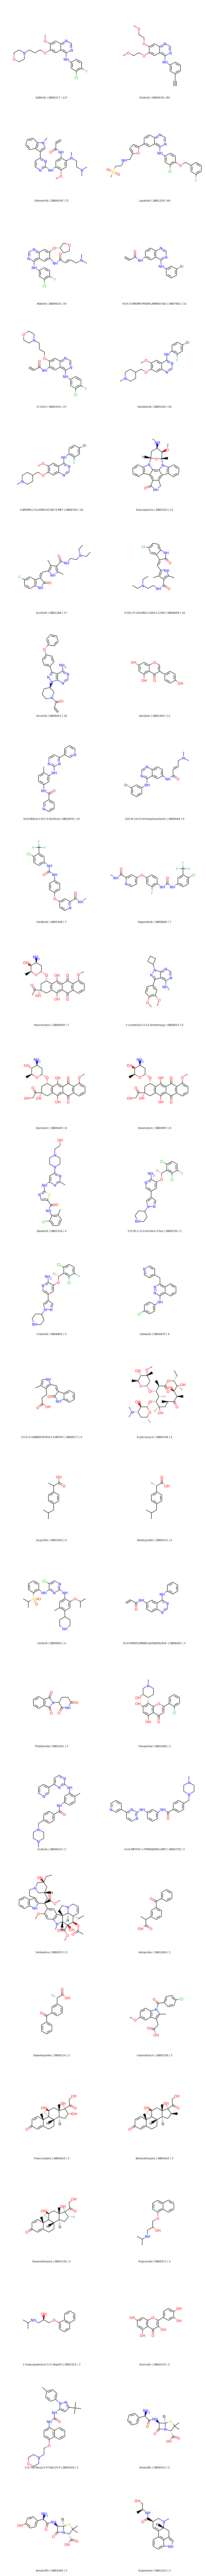

In [32]:
Hit_molecules = [drugs[i] for i in ordered_drugs_hitcounts]
Draw.MolsToGridImage(Hit_molecules, molsPerRow=2, subImgSize=(500,500), maxMols=50,
                     legends=["{} | {} | {}".format(drugs[i].GetProp('GENERIC_NAME')[:30],
                                                    drugs[i].GetProp('DRUGBANK_ID'),
                                                    drugs_hitcounts[i])
                              for i in ordered_drugs_hitcounts])

Zde jsem zobrazil 50 ligandů drugbanku s nejpočetnější similaritou s látkami v mém datasetu (myslím, že vykreslovat jich všech 13-set není nutné)

K povšimnutí stojí fakt, že 7 látek z top 10-ky (11-ky -> 2 stuktury jsou identické) mají ve své struktuře opět CHINOZINOLINYLAMIN.

Když jsem se podíval, alespoň na prvních 10 látek s čím mám tu čest zjistil jsem, že většina jsou prokázané inhibitory erbB1 (EGFR) receptoru.

Gefitinib a Erlotinib jsou inhibitory, které se reverzibilně váží do ATP-vazebného místo tyrosinových kinás, které jsou součásti erbB1 receptorů. Gefinitib bylo dokonce první léčivo tohoto typu.

Osimertinib je nejznámější zástupce třetí generace ireverzibilních inhibitorů tyrosinových kinás EGFR receptorů. Tyto léčiva byla vynalezena, kvůli vyvýjející se resistenci EGFR receptorů na inhibitory první generace (Gefitinib a Erlotinib). Osimertinib a jemu podobné molekuly lépe odpovídají na specifické mutace T790M.

Lapatinib a Afatinib jsou zástupci druhé generace inhibitorů tyrosinových kinás. Jedná se o ireverzibilní inhibitory, které prokazují nejen vůči EGFR receptoru, ale i vůči Her2 receptoru. Jejich použití je však spojené s vyšší toxicitou.

Látky DBO7662 a CI-1033 (Canertinib) jsou taktéž ireversibilní inhibitory tyrosinových kinás, které strukturou a MoA spadají do druhé generace. Canertinib byl dokonce kandidát pro klinické testy, jeho vývoj byl však zastaven.

Následující dvě látky jsou identické jedná se o 2 již zmíněné ligndy 4448 a 6583. Jedná se o Vandetanib, taktéž jeden z tyrosinových inhibitorů.

Staurosporine, který by měl mít v tomto setu 21 podobných látek, je antibiotikum izolované bakterie Streptomyces staurosporeus.

A konečně poslední člen top 10-ky je Sunitib což je inhibitor tyrosinových kinas většího počtu různých receptorů.


In [33]:
def DistanceFunction(index1, index2, *args, fingerprints=erbB1_ligands_ECFP,
                      metric=DataStructs.TanimotoSimilarity):
    return 1 - DataStructs.FingerprintSimilarity(fingerprints[index1],
                                                 fingerprints[index2],
                                                 metric=metric)

In [34]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
picker = MaxMinPicker()
picked = list(picker.LazyPick(DistanceFunction, len(lig_MOLECULES), 45))
picked

[2486,
 399,
 5446,
 9013,
 7390,
 4009,
 1831,
 6161,
 5760,
 10858,
 3572,
 5659,
 9754,
 2629,
 8711,
 3386,
 3204,
 6091,
 6554,
 7304,
 8736,
 746,
 6839,
 9214,
 2129,
 5898,
 12095,
 1966,
 8002,
 3915,
 4303,
 7774,
 10314,
 4408,
 5914,
 8707,
 4172,
 5879,
 9746,
 4026,
 6232,
 3872,
 6415,
 9174,
 4372]

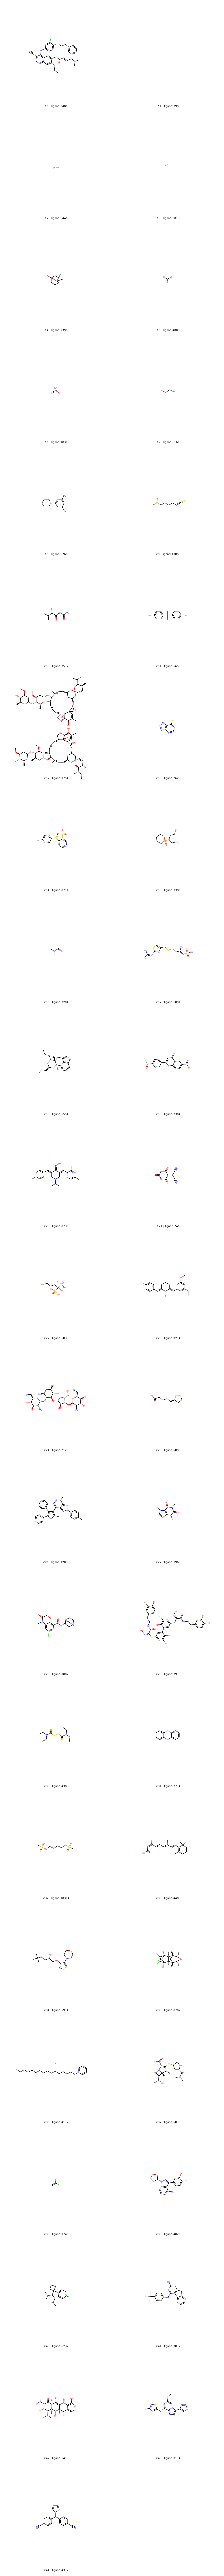

In [35]:
Draw.MolsToGridImage([lig_MOLECULES[x] for x in picked], molsPerRow=2, subImgSize=(500,500),
                     legends=["#{} | ligand {}".format(x, hit) for x, hit in enumerate(picked)])


Vygenerovaný list odlišných látek mého listu je opravdu pestrý. Makrocyklus, polycyklus, cyklodextrin, surfaktant, derivát adamantanu, pseudopeptid, dokonce i CHLOROFORM se tam vešel :D

lig_MOLECULES[399]

In [36]:
ligands_no_duplicates_smiles = []
for l in lig_MOLECULES:
    if Chem.MolToSmiles(l) in ligands_no_duplicates_smiles:
        continue
    ligands_no_duplicates_smiles.append(Chem.MolToSmiles(l))
len(ligands_no_duplicates_smiles)

9060

In [37]:
drugbank_no_duplicates_smiles = []
for l in drugs:
    if Chem.MolToSmiles(l) in drugbank_no_duplicates_smiles:
        continue
    drugbank_no_duplicates_smiles.append(Chem.MolToSmiles(l))
len(drugbank_no_duplicates_smiles)

7019

Nakonec jsem se nechal inspirovat Aničkou a zkontroloval i svůj set na duplicitu.

Můj set se zmenšil o 27,5 % to je celkem dost :-( (9060 z 12496.

Drugbank v tom má naštěstí větší pořádek, nějakých 1,4 %. Je to vlastně celkem štěstí, že jsem se do té duplicity trefil :D. 

In [38]:
ligands_no_duplicates = [Chem.MolFromSmiles(l) for l in ligands_no_duplicates_smiles]
erbB1_ECFP_new = [Chem.GetMorganFingerprintAsBitVect(l, 2, nBits = 1024) for l in ligands_no_duplicates]

In [39]:
erbB1_ligands_queries_new = [(i, SimilaritySearch(ligand_ECFP, drugs_ECFP))
                     for i, ligand_ECFP in enumerate(erbB1_ECFP_new)]
erbB1_ligands_queries_new

[(0, []),
 (1, []),
 (2, []),
 (3, []),
 (4, []),
 (5, []),
 (6, []),
 (7, []),
 (8, []),
 (9, []),
 (10, []),
 (11, []),
 (12, []),
 (13, []),
 (14, []),
 (15, []),
 (16, [(1429, 1.0)]),
 (17, []),
 (18, []),
 (19, []),
 (20, []),
 (21, []),
 (22, []),
 (23, []),
 (24, []),
 (25, []),
 (26, []),
 (27, []),
 (28, []),
 (29, []),
 (30, []),
 (31, []),
 (32, []),
 (33, []),
 (34, [(5522, 0.803921568627451)]),
 (35, []),
 (36, []),
 (37, []),
 (38, []),
 (39, []),
 (40, []),
 (41, []),
 (42, []),
 (43, []),
 (44, []),
 (45, []),
 (46, []),
 (47, []),
 (48, []),
 (49, []),
 (50, []),
 (51, []),
 (52, []),
 (53, []),
 (54, []),
 (55, []),
 (56, []),
 (57, []),
 (58, []),
 (59, []),
 (60, []),
 (61, []),
 (62, []),
 (63, [(1132, 1.0)]),
 (64, []),
 (65, []),
 (66, []),
 (67, []),
 (68, []),
 (69, []),
 (70, []),
 (71, []),
 (72, []),
 (73, []),
 (74, [(2685, 1.0)]),
 (75, [(6291, 0.8333333333333334)]),
 (76, []),
 (77, []),
 (78, []),
 (79, []),
 (80, []),
 (81, []),
 (82, []),
 (83, []),
 (

In [40]:
erbB1_ligand_Hits_new = [hit for hit in erbB1_ligands_queries_new if hit[1]]
erbB1_ligand_Hits_new

[(16, [(1429, 1.0)]),
 (34, [(5522, 0.803921568627451)]),
 (63, [(1132, 1.0)]),
 (74, [(2685, 1.0)]),
 (75, [(6291, 0.8333333333333334)]),
 (108, [(3438, 0.8113207547169812)]),
 (140, [(5522, 1.0)]),
 (143, [(1004, 1.0), (2587, 1.0)]),
 (145, [(415, 1.0)]),
 (147, [(892, 1.0)]),
 (149, [(302, 1.0), (937, 0.84)]),
 (153, [(428, 1.0)]),
 (155, [(771, 1.0)]),
 (163, [(1128, 1.0), (242, 0.8064516129032258)]),
 (184, [(3721, 1.0)]),
 (192, [(1132, 0.8690476190476191)]),
 (205, [(4476, 1.0)]),
 (263, [(4346, 1.0)]),
 (274, [(3438, 0.9056603773584906)]),
 (275, [(5522, 0.84)]),
 (290, [(5853, 1.0), (1140, 0.8032786885245902)]),
 (334, [(1754, 0.8125)]),
 (357, [(380, 1.0), (1229, 0.8805970149253731)]),
 (374, [(4448, 1.0), (6583, 1.0)]),
 (375, [(1076, 0.8043478260869565)]),
 (376, [(848, 1.0)]),
 (377, [(4677, 1.0)]),
 (378, [(337, 1.0)]),
 (383, [(681, 0.8095238095238095)]),
 (384, [(370, 1.0)]),
 (385, [(1123, 0.9888888888888889)]),
 (387, [(326, 1.0)]),
 (389, [(2344, 1.0), (2374, 0.82758

In [41]:
len(erbB1_ligands_queries_new), len(erbB1_ligand_Hits_new)

(9060, 774)

Tak s vyloučením duplikátů se 40 % to už je trochu větší odchylka.

In [42]:
drugs_hitcounts_new = {}
for ligand, hits in erbB1_ligand_Hits_new:
    for hit, similarity in hits:
        drugs_hitcounts_new[hit] = drugs_hitcounts_new.get(hit, 0) + 1

In [43]:
ordered_drugs_hitcounts_new = sorted(drugs_hitcounts_new.keys(), key=lambda x: drugs_hitcounts_new[x], reverse=True)
ordered_drugs_hitcounts_new

[1132,
 6690,
 4448,
 6583,
 7018,
 4476,
 3438,
 207,
 5897,
 1140,
 6388,
 90,
 579,
 5522,
 415,
 5853,
 919,
 332,
 876,
 455,
 928,
 6927,
 505,
 330,
 1109,
 456,
 2939,
 6796,
 6291,
 302,
 937,
 1128,
 242,
 4346,
 1754,
 1076,
 3095,
 504,
 4212,
 4489,
 1066,
 1411,
 5409,
 732,
 320,
 98,
 1212,
 278,
 508,
 714,
 925,
 476,
 1087,
 566,
 1663,
 3547,
 231,
 830,
 426,
 199,
 840,
 671,
 888,
 6928,
 218,
 187,
 881,
 186,
 408,
 639,
 861,
 210,
 453,
 4310,
 1053,
 1077,
 923,
 1013,
 1041,
 2678,
 3497,
 279,
 991,
 289,
 1518,
 1429,
 2685,
 1004,
 2587,
 892,
 428,
 771,
 3721,
 380,
 1229,
 848,
 4677,
 337,
 681,
 370,
 1123,
 326,
 2344,
 2374,
 4071,
 211,
 586,
 1238,
 1027,
 1129,
 6401,
 3772,
 1638,
 371,
 4819,
 5628,
 6174,
 814,
 268,
 5003,
 657,
 1110,
 154,
 2513,
 709,
 342,
 908,
 1369,
 465,
 643,
 88,
 6430,
 4634,
 564,
 6838,
 668,
 1108,
 469,
 1046,
 856,
 1012,
 728,
 85,
 525,
 3121,
 3645,
 1533,
 5207,
 6136,
 5896,
 5898,
 164,
 4952,
 427,
 9

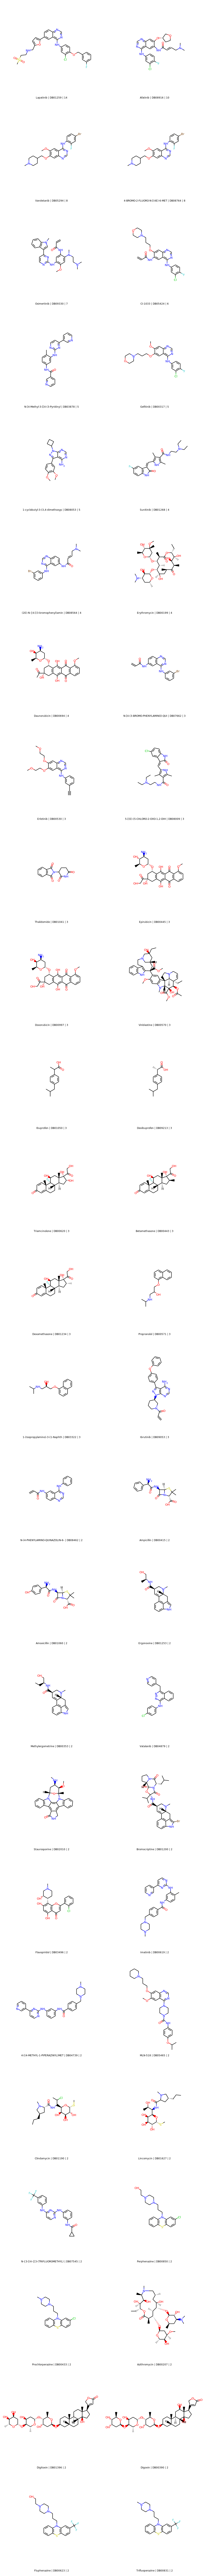

In [44]:
Hit_molecules_new = [drugs[i] for i in ordered_drugs_hitcounts_new]
Draw.MolsToGridImage(Hit_molecules_new, molsPerRow=2, subImgSize=(500,500), maxMols=50,
                     legends=["{} | {} | {}".format(drugs[i].GetProp('GENERIC_NAME')[:30],
                                                    drugs[i].GetProp('DRUGBANK_ID'),
                                                    drugs_hitcounts_new[i])
                              for i in ordered_drugs_hitcounts_new])

Notak musím říct, že pokud počítám správně, což doufám :D Počty šli dramitcky dolů.

V první desítce se vyskytují víceméně stejné látky, ovšem počet podobností a jejich pořadí se dost změnilo.